# Prepare

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
path = "D:\\Kadir\\Codes\\kdr_data_science_py\\data\\"

In [76]:
loans_income = pd.read_csv(path + "\\loans_income.csv").iloc[:, 0]
sp500_px = pd.read_csv(path + "\\sp500_px.csv")

## 2.1

### Take a simple random sample

In [77]:
samp_data = pd.DataFrame({
    'income': np.random.choice(loans_income, 1000),
    'type': 'Data'
})

### Take a sample of means of 5 values

In [78]:
samp_mean_05 = pd.DataFrame({
    'income': [np.mean(np.random.choice(loans_income, 5)) for _ in range(1000)],
    'type': 'Mean of 5'
})

### Take a sample of means of 20 values

In [79]:
samp_mean_20 = pd.DataFrame({
    'income': [np.mean(np.random.choice(loans_income, 20)) for _ in range(1000)],
    'type': 'Mean of 20'
})

### Concatenate the dataframes and convert type to a categorical variable

In [80]:
income = pd.concat([samp_data, samp_mean_05, samp_mean_20])
income['type'] = pd.Categorical(income['type'], categories=['Data', 'Mean of 5', 'Mean of 20'])


### Plot the histograms

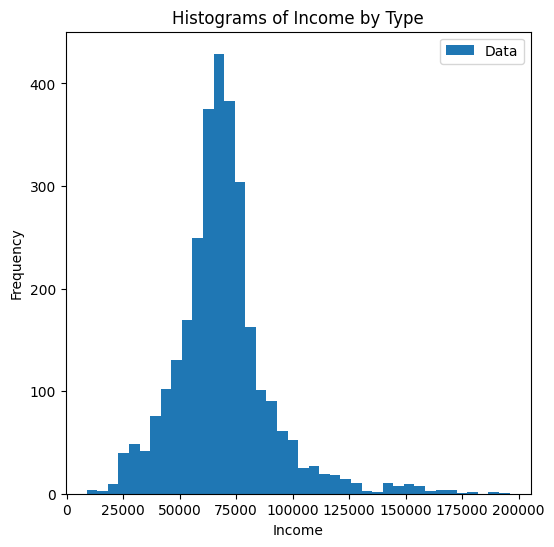

In [81]:
plt.figure(figsize=(6, 6))
plt.hist(income['income'], bins=40)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histograms of Income by Type')
plt.legend(income['type'].unique())
plt.show()

### Normal distribution - QQ Plot of sample of 100 values drawn from a normal distribution

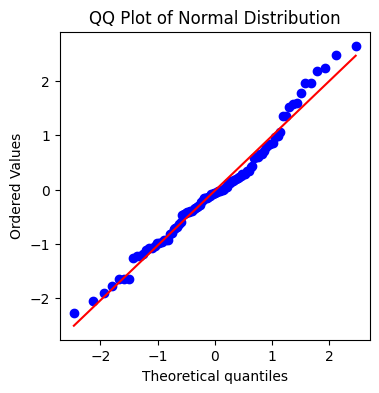

In [82]:
norm_samp = np.random.normal(size=100)
plt.figure(figsize=(4, 4))
stats.probplot(norm_samp, plot=plt)
plt.title('QQ Plot of Normal Distribution')
plt.show()

### Long-Tailed Distributions - QQ Plot of the returns for NFLX

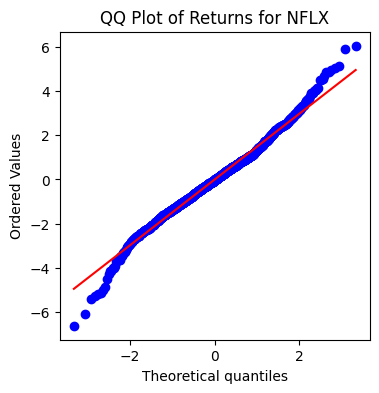

In [83]:
nflx = sp500_px['NFLX']
nflx_returns = np.diff(np.log(nflx[nflx > 0]))
plt.figure(figsize=(4, 4))
stats.probplot(nflx_returns, plot=plt)
plt.title('QQ Plot of Returns for NFLX')
plt.show()

### If the probability of a click converting to a sale is 0.02, what is the probability of observing k sales in 200 clicks?

In [84]:
p = 0.02
n = 200
k = 1
prob_k_sales = stats.binom.pmf(k, n, p)
prob_k_or_fewer_sales = stats.binom.cdf(k, n, p)
print(f"Probability of observing {k} sale in 200 clicks: {prob_k_sales:.3f}")
print(f"Probability of observing {k} or fewer sales in 200 clicks: {prob_k_or_fewer_sales:.3f}")


Probability of observing 1 sale in 200 clicks: 0.072
Probability of observing 1 or fewer sales in 200 clicks: 0.089


### Poisson Distribution: Mean 2 : Generate 100 random data points

In [85]:
poisson_data = np.random.poisson(2, size=100)
print(poisson_data)

[1 1 2 4 1 3 1 2 3 0 0 5 0 0 3 6 2 2 2 0 2 2 2 1 1 1 1 3 2 1 0 0 3 3 2 1 1
 1 1 1 1 1 2 1 1 5 4 3 3 2 2 3 4 2 2 3 3 4 4 4 1 1 1 4 2 2 4 1 1 0 1 1 2 1
 2 2 1 2 1 4 2 1 4 0 3 4 2 4 2 0 1 3 1 3 0 6 1 2 0 2]


### Exponential Distribution: The mean number of events per time period is 2: Generate 100 intervals

In [86]:
exponential_data = np.random.exponential(scale=1/0.2, size=100)
print(exponential_data)

[12.98422297  6.64742575  2.88426305  1.10344906  3.8608757   4.51922686
  3.16668989  1.15852892  6.05439419  1.36351006  4.09473737  1.00869828
 21.09226056 20.47774825  5.08498777  1.432544    4.87339254  4.99700388
  2.99138602  8.14715487  0.45336417  4.39846668  6.03620144  6.39323436
  4.69871469  1.09813914  2.83263755  4.55652739 18.50192975 14.60938654
  0.7601053   6.34702122  1.07640359  2.46079405  4.66844317  5.85695048
  1.25279693  0.75301633 10.29320023  2.79148355  2.6853962   3.59448383
  2.18566919 13.95420377  6.83484689  0.6163779   1.59083245  4.32089496
  1.72223268  2.50580642  5.98447037  5.38071181  2.05360525  2.1638176
  8.90422238  1.029172    1.69374296  0.27417536  3.91351046  2.46724101
  0.71000945  0.33405076  2.67269977  1.52470381  8.03596887  8.01022627
  3.55113972  7.97598126  0.43497674  4.73371272  1.48790167  2.16269392
  0.42839814  2.05261561  6.29472473  1.30732113  6.00910904  0.23523407
  3.16862492 10.19499605  4.92734897  3.78899322 13.

### Generate 100 random values from the Weibull distribution

In [87]:
weibull_data = np.random.weibull(1.5, size=100) * 5000
print(weibull_data)

[ 2170.3476275   4947.09065201  2735.15078196 12654.53638763
  5670.72306262  1077.94630676  2900.09774121   771.93370792
  3437.26333139 10139.60630833  5438.09988139  7891.2898973
  4092.12102361  4619.18148944  3713.50742691    53.96285447
  9164.75337575  1814.19748609  5357.14379519  8533.53252174
  4781.775185    5589.32933771  4543.84220756  5884.44723382
  4370.98991661  4754.52095093  5533.4767695   1784.37710512
  1683.27160684  2208.29645349  4606.37632956  5462.86125032
  4620.08933182  2597.05881065  9113.76483562  3901.47815571
  5253.02090773 11767.21877837 10720.79951733  3906.66502477
  4377.48619493  4831.27766732  7343.64292411  6341.41500612
  4682.41687422  1877.68718455  5862.58375842 12441.44311965
  1178.38682564  2051.01576839  1407.42164507  2816.30386262
  2959.50257634  5866.90401502  5586.50427296  3304.73280473
  8088.20565754  1803.43282468  6903.11597271  5183.82669221
  4063.42553023  3091.78708551  7791.99087198  3091.84537675
  7880.29820129  4680.677

### Histogram of Weibull Distribution

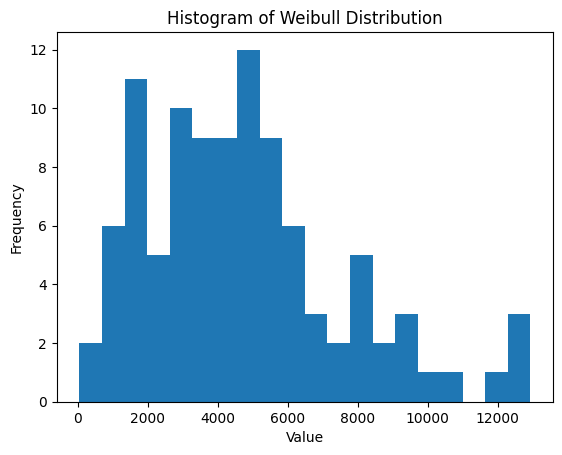

In [88]:
plt.hist(weibull_data, bins=20)
plt.title("Histogram of Weibull Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()